In [91]:
import csv
from datetime import datetime
from collections import defaultdict

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

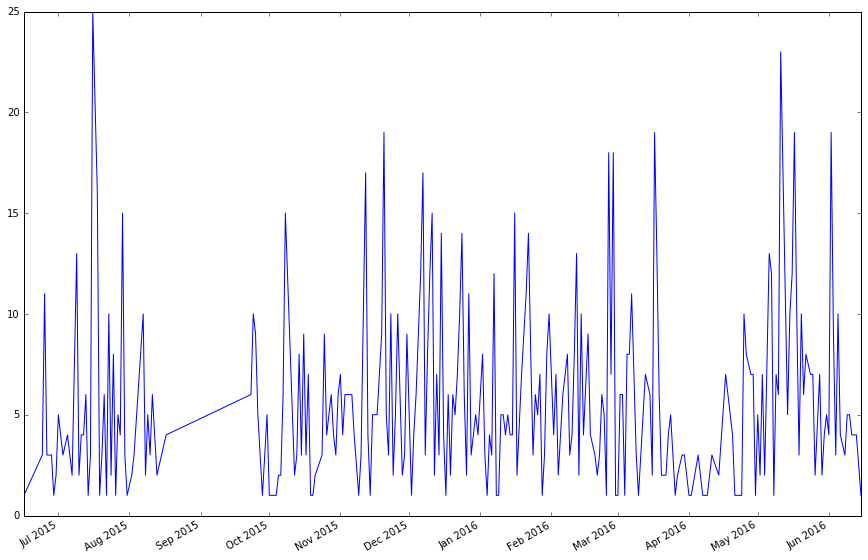

In [92]:
def Datetime64ToDatetime(d):
    d = d[:10]  # Slice to just date
    return datetime.strptime(d, '%Y-%m-%d')

people = {}
dates = defaultdict(int)

with open('people.tsv', 'r') as f:
    f.readline()  # Skip header row
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        people[row[0]] = row[1]
        
with open('insults.tsv', 'r') as f:
    f.readline()  # Skip header row
    reader = csv.reader(f)
    for row in reader:
        date = Datetime64ToDatetime(row[5])
        dates[date] += 1

x, y = [], []
for k in dates.keys():
    x.append(k)
x.sort()

for date in x:
    y.append(dates[date])

plt.plot(x, y)
plt.gcf().autofmt_xdate()
plt.gcf().set_size_inches((15, 10))
plt.show()